## Background / Motivation

Our group decided to study the deaths related to alcohol use disorders since we noticed an unhealthy relationship within our society. In the United States, the legal drinking age is 21; however, this law is broken by a large proportion of people. As a result, the youth is not taught how to drink responsibly from an early age, and we believe this partly contributes to this unhealthy relationship. This observation is what initially attracted our group to look into alcohol datasets. 

Once we began examining different datasets, we started to think about the best data to look at to make a model. After mining through many different datasets and considering the various implications, we examined the factors influencing alcohol-related mortality. We chose this dataset because it had sufficient predictors we could use to generate a compelling model.

## Problem statement 

Through limited research, we discovered that alcohol is responsible for 3 million deaths annually (5.3% of all deaths worldwide), according to the World Health Organization (WHO). We wanted to investigate this data more as we believe understanding the trends of alcohol-related deaths across different countries can help identify risk factors and inform policies. Through this project, we wanted to uncover which habits/indicators contribute to mass unhealthy drinking.

In the context of this problem, we created a logistic model to classify a country as either high risk or not high risk. We defined this parameter as countries with attributable mortality rates greater than 6%. 

Overall, our problem was mostly an inference problem. It is in part a prediction problem because at the end of our project, we wanted to be able to predict if the country is high risk given the predictors and nothing else. However, it is more inference because our goal is not to predict a country's class but primarily to understand the relationship between the predictors and the response to understand which factors are leading to this high death rate. Our main goal is to identify predictors that have a strong impact on the response so that we can provide helpful recommendations to our stakeholders about these specific predictors.

## Data sources

As we were researching this topic, we found a very informative article which helped give us a general idea of which predictors may have a large role in the high percentage of deaths (link: https://ourworldindata.org/alcohol-consumption). This article provides many interactive visuals that gave us crucial background information to create our model. Each visual included a CSV with the data used which we downloaded and cleaned to use in our model. 

## Stakeholders

The model has three main stakeholders, educators, health services, and governments, each with a crucial role in reducing the negative effects of alcohol misuse.

Educators are one of the primary stakeholders in this project. By analyzing which factors contribute to a country being classified as high-risk, schools can effectively educate the youth on how to have healthy drinking habits. For example, they can focus on promoting responsible drinking behavior and provide information on the health consequences of alcohol misuse. Additionally, they can work on creating prevention programs that target high-risk individuals or groups. 

The second stakeholder, health services, plays a critical role in reducing the death rate related to alcohol misuse. This will enable them to identify high-risk individuals before they die, based on their demographic and other information available in our predictors. For example, doctors can use this information to identify patients who may be at risk for alcohol-related illnesses or who may require additional support to avoid harmful drinking behaviors. 

Governments are the third stakeholder in our project. By using our statistical analysis, they can more effectively target their laws and policies to foster a society with healthy drinking habits. For example, they may want to implement stricter regulations on the distribution, production, and purchase of alcohol in their country.

## Data quality check / cleaning / preparation 

In [9]:
import pandas as pd
import numpy as np
train = pd.read_csv('./Datasets/merged.csv')
train = train.rename(columns = {'too_many_alc_deaths': 'high_risk'})
train = train.iloc[:,3:]
train.describe().T

,count,mean,std,min,25%,50%,75%,max
wine_as_share_alcohol_consumption,172.0,1.597616e+01,1.746450e+01,0.000000,2.100000e+00,8.400000e+00,2.792500e+01,8.020000e+01
beer_as_share_alcohol_consumption,172.0,4.401279e+01,2.215635e+01,2.300000,2.927500e+01,4.040000e+01,5.745000e+01,1.000000e+02
spirits_as_share_alcohol_consumption,172.0,2.878895e+01,2.365740e+01,0.000000,1.050000e+01,2.385000e+01,4.215000e+01,9.730000e+01
tot_alcohol_consumption_per_capita_liters,176.0,6.147551e+00,4.199294e+00,0.003000,2.190000e+00,5.910000e+00,9.580000e+00,1.835000e+01
gdp_per_capita,176.0,1.931067e+04,2.002981e+04,825.205688,4.382449e+03,1.193486e+04,2.791289e+04,1.131827e+05
Population,176.0,4.119821e+07,1.491975e+08,89958.000000,2.299560e+06,8.799540e+06,2.933118e+07,1.393715e+09
percent_who_have_not_drank_alcohol_in_last_year,175.0,6.060286e+01,2.333480e+01,8.200000,4.080000e+01,6.360000e+01,7.810000e+01,9.990000e+01
perc_life_no_drink,181.0,4.418398e+01,2.828417e+01,3.400000,1.790000e+01,4.160000e+01,6.640000e+01,9.950000e+01
total_alcohol_consumption_per_capita_liters,182.0,6.044143e+00,4.194188e+00,0.003000,2.152500e+00,5.825000e+00,9.550000e+00,1.835000e+01
percent_who_have_drank_alcohol_in_last_year,174.0,3.944540e+01,2.339338e+01,0.100000,2.190000e+01,3.640000e+01,5.945000e+01,9.180000e+01


Our group collected all of our data from WHO. We cleaned each individual dataset and then merged them all together. The majority of these predictors were each in their own table so we had many values to merge on Country. 

We ultimately resulted in 183 observations (representing 183 different countries - population data) and 37 total predictors. We then classified a high death rate as a mortality rate above 6% as a new binary column in our merged dataset. 

## Exploratory data analysis

In [10]:
train.corrwith(train.high_risk).sort_values(ascending = False)

high_risk                                          1.000000
alc_attributed_fraction_deaths                     0.655563
total_alcohol_consumption_per_capita_liters        0.453060
tot_alcohol_consumption_per_capita_liters          0.447922
share_alc_use_disorders_male                       0.416365
perc_heavy_drinkers_female                         0.415058
daly_alc_use_disorders_50_69                       0.408540
daly_alc_use_disorders_all_ages                    0.405293
prev_alc_use_disorders_age_50_69                   0.404603
daly_alc_use_disorders__all_ages_standardized      0.402697
daly_alc_use_disorders_15_49                       0.399031
perc_heavy_drinkers_male                           0.398390
perc_heavy_drinkers_both_sexes                     0.392347
share_alc_use_disorders_both_sexes                 0.382273
prev_alc_use_disorders_age_70                      0.377033
perc_dependent_male                                0.358100
prev_alc_use_disorders_all_ages         

Text(0.5, 0, 'prev_alc_use_disorders_age_50_69')

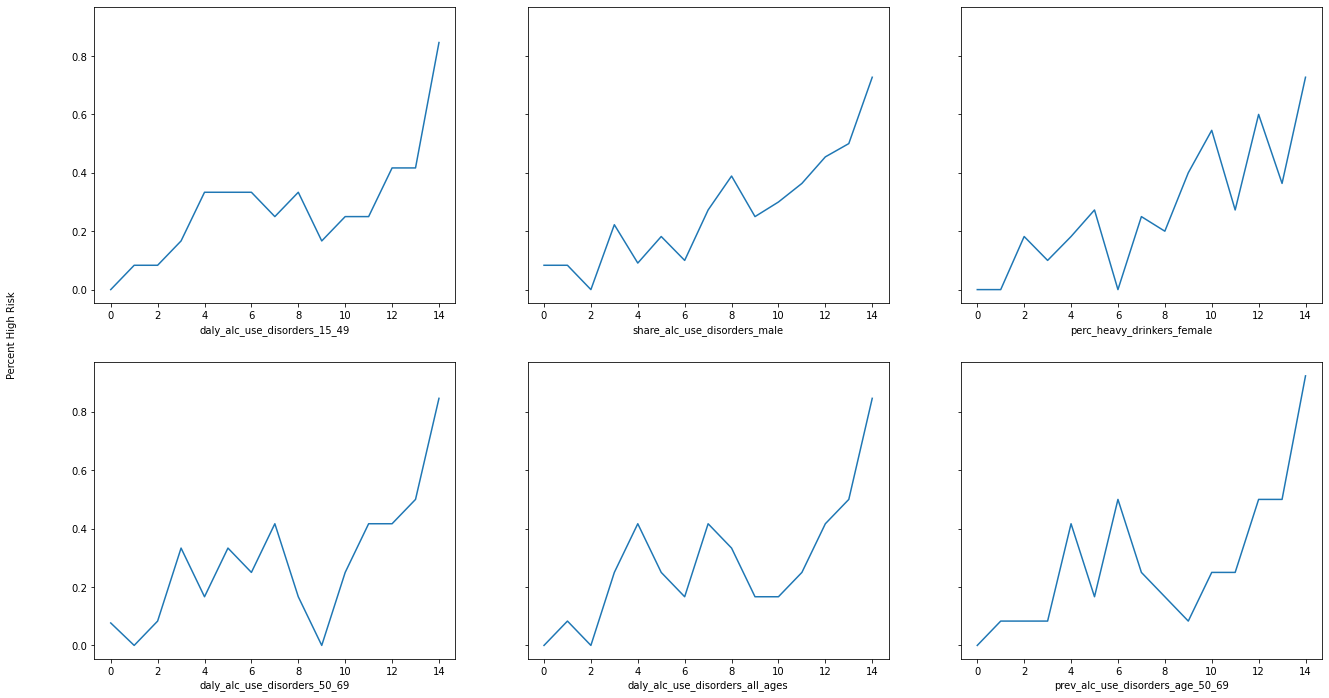

In [12]:
# For the 6 most correlated predictors, examine the relationship between a binned version of each
# of these variables and the response variable to determine any possible transformations

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,3,figsize=(22,12),sharey=True)
fig.text(0.07, 0.5, 'Percent High Risk', va='center', rotation='vertical')

#1
binned1 = pd.qcut(train['daly_alc_use_disorders_15_49'],15,retbins=True)
train['daly_alc_use_disorders_15_491'] = binned1[0]
new_data = train.groupby('daly_alc_use_disorders_15_491')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[0,0], x=new_data.index, y= new_data['hi_percent'])
axes[0,0].set_xlabel('daly_alc_use_disorders_15_49')
axes[0,0].set_ylabel('')


#2
binned2 = pd.qcut(train['share_alc_use_disorders_male'],15,retbins=True)
train['share_alc_use_disorders_male'] = binned2[0]
new_data = train.groupby('share_alc_use_disorders_male')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[0,1], x=new_data.index, y= new_data['hi_percent'])
axes[0,1].set_xlabel('share_alc_use_disorders_male')

#3
binned3 = pd.qcut(train['perc_heavy_drinkers_female'],15,retbins=True,duplicates='drop')
train['perc_heavy_drinkers_female'] = binned3[0]
new_data = train.groupby('perc_heavy_drinkers_female')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[0,2], x=new_data.index, y= new_data['hi_percent'])
axes[0,2].set_xlabel('perc_heavy_drinkers_female')

#4
binned4 = pd.qcut(train['daly_alc_use_disorders_50_69'],15,retbins=True)
train['daly_alc_use_disorders_50_69'] = binned4[0]
new_data = train.groupby('daly_alc_use_disorders_50_69')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[1,0], x=new_data.index, y= new_data['hi_percent'])
axes[1,0].set_xlabel('daly_alc_use_disorders_50_69')
axes[1,0].set_ylabel('')

#5
binned5 = pd.qcut(train['daly_alc_use_disorders_all_ages'],15,retbins=True)
train['daly_alc_use_disorders_all_ages'] = binned5[0]
new_data = train.groupby('daly_alc_use_disorders_all_ages')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[1,1], x=new_data.index, y= new_data['hi_percent'])
axes[1,1].set_xlabel('daly_alc_use_disorders_all_ages')

#6
binned6 = pd.qcut(train['prev_alc_use_disorders_age_50_69'],15,retbins=True)
train['prev_alc_use_disorders_age_50_69'] = binned6[0]
new_data = train.groupby('prev_alc_use_disorders_age_50_69')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[1,2], x=new_data.index, y= new_data['hi_percent'])
axes[1,2].set_xlabel('prev_alc_use_disorders_age_50_69')

- When we began to manually create a model in the beginning, we knew that it would be inefficient to test a lot of predictors with each other without much direction. Thus, we decided to look at which variables correlated the most with our indicator variable, and we would explore different models using these more correlated variables.
- Since, again, it would be inefficient to test many different transformations with a large number of variables, we created bins for some variables (mostly the more correlated ones) and graphed the progression of these bins against the indicator variable, to see if they had a linear relationship or another relationship that would warrant some sort of corresponding transformation.

## Approach

We used a logistic model since our response variable was binary (high mortality rate/not high mortality rate), and we sought to optimize classification accuracy. Though, as we were developing the model, we felt it was less risky to classify a country as high-risk (and have them address an issue) than leave a high-risk country vulnerable. As a result, we also worked to minimize the false negative rate. 
Since our dataset had very low observations and a lot of predictors, we definitely anticipated many problems. With regards to the low observations, we ran into issues with dealing with how to subset the data for training and testing purposes so that we could get the best model possible. With regard to the predictors, we ran into the issue of having too many combinations to choose from. This was difficult for us when it came to manually trying out different models (based on our EDA) because we couldn't possibly exercise all of our options. It was also difficult to use subset selection methods because having that many predictors is very computationally taxing, so some methods took a very long time to execute and others simply were not even feasible.

## Developing the model

We began by splitting up our data into 10 equal-sized subsets to allow for 10-fold cross-validation to test the results of our different models. 

First, we created a model based solely on the five most correlated predictors with the response variable to create a baseline to compare our future models. We would have normally created a naive model using all of the predictors in the dataset, but given the small number of observations and a large number of predictors, K-Fold CV was not functioning on this model, so we settled for only five predictors. This model resulted in an average classification accuracy of 88.5% and an average FNR of 26.2% over the 10 datasets that we used in our K-Fold CV. Our goal through the rest of the project was to improve upon these two metrics (reduce FNR and increase classification accuracy).

We then ran forward stepwise selection without interactions to try to identify the most significant predictors in our model. This resulted in a model with 6 predictors, an average classification accuracy of 87.8%, and an average FNR of 1.7% over the 10 datasets that we used in our K-Fold CV (an improvement over our naive model in FNR, but not classification accuracy). 

After examining the results of this first round of forward selection, we decided to run forward stepwise selection with interactions on the filtered predictors to hopefully increase the model efficiency. Although it would have been ideal to run forward selection with interaction on all 37 predictors, this would have taken far too much time and computing power. After including these interaction terms, our model achieved an average classification accuracy of 88.3% and an average FNR of 2.0% over the 10 datasets that we used in our K-fold CV. These results are extremely similar to the naive model in terms of classification accuracy, but much more successful in terms of FNR.

Next, we decided to try to include transformations to the predictors in our model to further improve the model's efficiency. After conducting some new EDA, we decided to add in quadratic transformations of daly_alc_use_disorders__all_ages_standardized, gdp_per_capita, and total_alcohol_consumption_per_capita_liters and a cubic transformation of daly_alc_use_disorders__all_ages_standardized. When we ran forward stepwise selection on our dataset again, this time including transformations that we thought would be useful based on our EDA, the model did not change. Forward selection did not result in any new inclusion of the possible transformations that we identified. This indicates that there are not (or at least we were not able to find) any specific transformations to improve upon our classification accuracy of 88.3% and FNR of 2.0%. Again, it is possible that there are more efficient models to be found by using best subset selection instead of stepwise selection.

All in all, we believe that we did achieve our goal of improving upon the naive model. Our classification accuracy is nearly the exact same as the naive model, but our false negative rate is much lower. We consider this a success as we believe it is more dangerous to misclassify a country as a low risk than it is to be overly cautious. Thus, we see our improvement in FNR as an overall success.

Our final model is shown below.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
train = pd.read_csv('Datasets/merged.csv')
train = train.drop(columns = {'Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','Country', 'alc_attributed_fraction_deaths','Region'}, index = 182)
train = train.rename(columns = {'too_many_alc_deaths': 'high_risk'})
train = train.fillna(train.mean())
model = sm.logit(formula='high_risk~daly_alc_use_disorders__all_ages_standardized+perc_heavy_drinkers_both_sexes+perc_heavy_drinkers_both_sexes*spirits_as_share_alcohol_consumption+spirits_as_share_alcohol_consumption+perc_heavy_drinkers_both_sexes*total_alcohol_consumption_per_capita_liters+gdp_per_capita',data= train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.360802
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_risk   No. Observations:                  182
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.3969
Time:                        16:56:09   Log-Likelihood:                -65.666
converged:                       True   LL-Null:                       -108.89
Covariance Type:            nonrobust   LLR p-value:                 6.654e-16
==============================================================================================================================================
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     -4.2528      2.533     -1.679      0.093      -9.216       0.711
daly_alc_use_disorders__all_ages_standardized                                  0.0041      0.001      2.977      0.003       0.001       0.007
perc_heavy_drinkers_both_sexes                                                 0.0070      0.054      0.131      0.896      -0.098       0.112
spirits_as_share_alcohol_consumption                                          -0.0102      0.058     -0.174      0.862      -0.124       0.104
perc_heavy_drinkers_both_sexes:spirits_as_share_alcohol_consumption            0.0006      0.001      0.472      0.637      -0.002       0.003
total_alcohol_consumption_per_capita_liters                                   -0.0364      0.300     -0.121      0.903      -0.624       0.551
perc_heavy_drinkers_both_sexes:total_alcohol_consumption_per_capita_liters     0.0085      0.006      1.327      0.184      -0.004       0.021
gdp_per_capita                                                             -5.641e-05   1.79e-05     -3.147      0.002   -9.15e-05   -2.13e-05
==============================================================================================================================================
"""

#### Final Model Equation: 

p(high_risk) = 1 / (1+e^-x)

x = 0.0041 * daly_alc_use_disorders__all_ages_standardized + 0.0070 * perc_heavy_drinkers_both_sexes - 0.0102 * spirits_as_share_alcohol_consumption + 0.0006 * perc_heavy_drinkers_both_sexes * spirits_as_share_alcohol_consumption - 0.0364 * total_alcohol_consumption_per_capita_liters + 0.0085 * perc_heavy_drinkers_both_sexes * total_alcohol_consumption_per_capita_liters - 5.641e-05 * gdp_per_capita

## Limitations of the model with regard to inference / prediction

Our data is from 2016, which is certainly not ideal for inferences on the current world. However, there is not much reason to believe that the significance of our predictors and model should be considered obsolete any time soon, as there likely isn't much variety between the values of our predictors across the years. Additionally, we have data on a great majority of the countries, so our model should be relevant to stakeholders across most countries. However, the data is mostly from larger countries, so the model may not be as tailored to the conditions of smaller countries, and our recommendations may not be as accurate for them.

## Conclusions and Recommendations to stakeholder(s)

Our final model contained only 5 predictors out of the initial 41, so we think that these predictors ended up yielding the best model because of how relevant they are to our response variable. Thus, our recommendations are primarily inferences based on the indicators' presence in our model. Here, we outline these recommendations by the predictors:
- The predictor `daly_alc_use_disorders__all_ages_standardized` can help health services and governments as its significance in the final model teaches how impactful alcohol use disorders can be to a country's mortality rate. Health services can use this information to try to get more adept at spotting and treating alcohol use disorders, and governments can use it to provide funding for such endeavors by health services or by providing more programs to help people with alcohol use disorders. 
- The predictor `perc_heavy_drinkers_both_sexes` can help all stakeholders. Educators can use this information to present the true harms of heavy drinking to their country's youth, and health services and governments can use this information in a similar way that they would for the previous predictor.
- The predictor `spirits_as_share_alcohol_consumption` can also help all stakeholders. Educators can inform the youth of the potential dangers of frequently using spirits, health services can try to focus on developing methods that better treat patients who have drank spirits at an unhealthy rate, and governments may want to limit the production/distribution/consumption of spirits.
- The predictor `total_alcohol_consumption_per_capita_liters` can primarily help governments. They can monitor this predictor to gauge whether their country may be getting close to a dangerous amount of alcohol consumption, and then take precautions accordingly.
- The predictor `gdp_per_capita` can also primarily help governments. It would likely be used similarly to the previous predictor; if they notice that this value is fairly high then they may want to check in on the indicator variable.

Most of these recommendations should be fairly implementable and practical, to the point where they should be (at the minimum) worthy of consideration by the stakeholders. Additionally, we anticipated that there would be more relevant predictors that separated groups by certain demographics (age, sex, etc.), though none of our predictors did so, and stakeholders may want to hold off on targeting people that fit certain demographics if they implement our recommendations. That said, we want to emphasize that the stakeholders should be aware of the limitations listed earlier in this report, as these recommendations may not suit all stakeholders across all countries equally.

## GitHub and individual contribution {-}

https://github.com/jtroxel7/STAT303-2-LCJJ

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Lainey Neild</td>
    <td>Data Cleaning, Data Quality Check, and Project Presentation</td>
    <td>Cleaned many different datasets before merging all of the predictors into our merged dataset. Created the project presentation that was presented to the class.</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Charlie Lovett</td>
    <td>Data Cleaning, EDA, and Model Development</td>
    <td>Performed initial EDA to try and identify any possible transformations. Used forward stepwise selection to create a model without interactions.</td>
    <td>13</td>
  </tr>
    <tr>
    <td>Jacob Muriel</td>
    <td>Data Cleaning, Data Preparation</td>
    <td>Created our response variable artificially and shuffled the data to allow for K-fold CV. Large contributor to early model creation and attempts to add in transformations.</td>
    <td>47</td>    
  </tr>
    <tr>
    <td>Jack Troxel</td>
    <td>Data Cleaning, EDA, and Model Development</td>
    <td>Used forward stepwise selection again to create a model including interaction terms based on the first model created. Conducted some more EDA on these terms to again try and find possible transformations.</td>
    <td>41</td>    
  </tr>
</table>

Note that all members took part in the data cleaning process as there was a lot to be done. Also note that GitHub commit numbers vary significantly as much of the work was done in person on a singular computer.

We did not face any major challenges while using GitHub. We did, however, find that it was easier for us to work on the project in person off of a singular computer. When we were going through the model development process, it was tricky to make progress on one computer and then pick up where we left off on another. Overall, we found that working in person was more efficient for us, so we did not use GitHub as much as other groups may have.